In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
data_path = '../../data/temporal_lda/'

In [32]:
fandom_list = [i for i in os.listdir(data_path) if 'prev' in i]

In [33]:
len(fandom_list)

25

In [34]:
df = pd.read_csv(data_path + fandom_list[0], sep = '\t')

In [35]:
df.head()

,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,ChapterIndex,Chapters,Characters,Comments,CompleteDate,...,Notes,PublishDate,Rating,Relationship,Summary,Title,URL,UpdateDate,Words,Cos
0,NaN,Creator Chose Not To Use Archive Warnings,WldCatSprStr_14,0,Gen,NaN,1,"Merlin, Arthur Pendragon",0,2009-04-20,...,This is my very first attempt at Merlin/Arthur...,2009-04-20,General Audiences,NaN,"Merlin and Arthur are sparring, and Merlin get...",Lady Problems,http://archiveofourown.org/works/97502,NaN,610.0,0.922093
1,"Sex Magic, Magic Revealed, Romance, Loyalty",No Archive Warnings Apply,ximeria,12,M/M,NaN,1,"Merlin (Merlin), Arthur Pendragon, Arthur Pend...",1,2009-01-28,...,Done for the porn battle VII with the prompt o...,2009-01-28,Mature,"Merlin/Arthur Pendragon, Merlin/Arthur Pendrag...",Arthur makes plans for the future of Camelot,Shed the Weight of the World,http://archiveofourown.org/works/226230?view_a...,NaN,738.0,0.060114
2,NaN,No Archive Warnings Apply,harlequin,8,M/M,NaN,1,"Arthur Pendragon, Merlin (Merlin)",8,2009-01-24,...,Set after episode 113 Le Morte d\'Arthur.,2009-01-24,Explicit,Merlin/Arthur Pendragon,The shock of almost losing Merlin forces Arthu...,No Ordinary Love,http://archiveofourown.org/works/413753?view_a...,NaN,4135.0,0.619252
3,"Plot What Plot, Future Fic",No Archive Warnings Apply,waldorph,77,M/M,NaN,1,"Merlin, Arthur Pendragon",5,2008-11-27,...,NaN,2008-11-27,Explicit,Arthur Pendragon/Merlin,"As soon as it happens, Merlin knows it\'s goin...",Possession,http://archiveofourown.org/works/9849?view_adu...,NaN,935.0,0.046069
4,NaN,No Archive Warnings Apply,glass_icarus,5,Gen,NaN,1,"Arthur Pendragon, Uther Pendragon, Merlin",0,2009-03-31,...,For such_heights.,2009-03-31,General Audiences,Arthur/Merlin,"A thousand years later, Arthur finds Merlin ag...",look for me under your boot-soles,http://archiveofourown.org/works/85297,NaN,1819.0,0.041739


In [27]:
l = [1,2,3,4,5]
l[4:]

[5]

In [28]:

def create_timelist(df):
    timelist = df.PublishDate.drop_duplicates().tolist()
    timelist = [str(i)[:7] for i in timelist]
    return sorted(list(set(timelist)))

def create_timewindow(timelist, window_len, step):
    idx = 0
    window_all = []
    while idx <= len(timelist) - window_len:
        time_window = []
        for i in range(0, window_len):
            time_window.append(timelist[idx + i])
        idx += 3
        window_all.append(time_window)
    return window_all

def create_df_time(df, time_window):
    dfs = []
    for time in time_window:
        dfs.append(df[df.PublishDate.str[:7] == time])
    return pd.concat(dfs)

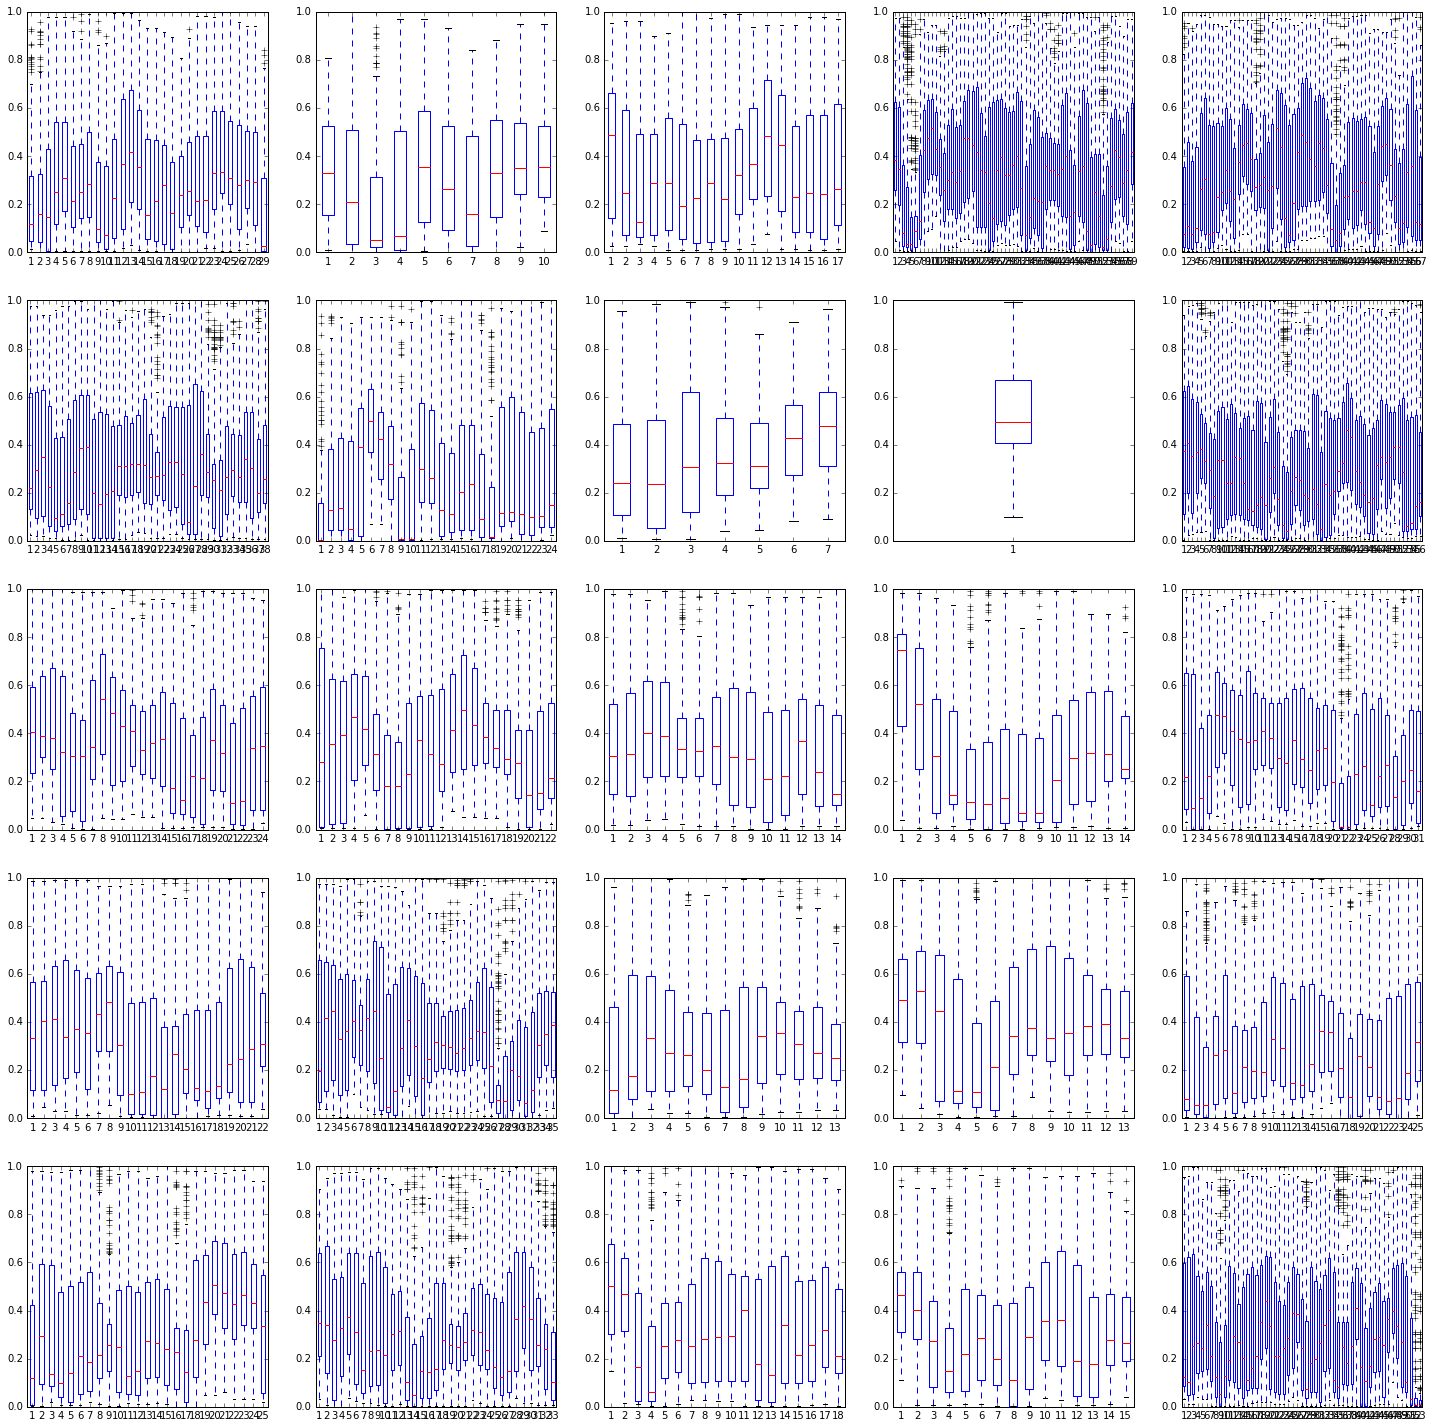

In [36]:
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.ravel()

for idx, fandom in enumerate(fandom_list):
    try:
        df = pd.read_csv(data_path + fandom, sep = '\t')
        timelist = create_timelist(df)
        windows = create_timewindow(timelist, 6, 3)
        x = []
        for window in windows:
            df_t = create_df_time(df, window)
            if len(df_t) > 0:
                x.append(df_t.Cos.tolist())    
        axs[idx].boxplot(x)
    except:
        pass
    
#     axs[idx].set_title(fandom.replace('.pkl', ''), fontsize=25)
# fig.text(0.5, 0.1,'Time', ha='center', va='center', fontsize=25)
# fig.text(0.08, 0.5, 'Cosine distance', ha='center', va='center', rotation='vertical',fontsize=25)

# plt.savefig('temporal_cos_dist_box.png', format='png')
    

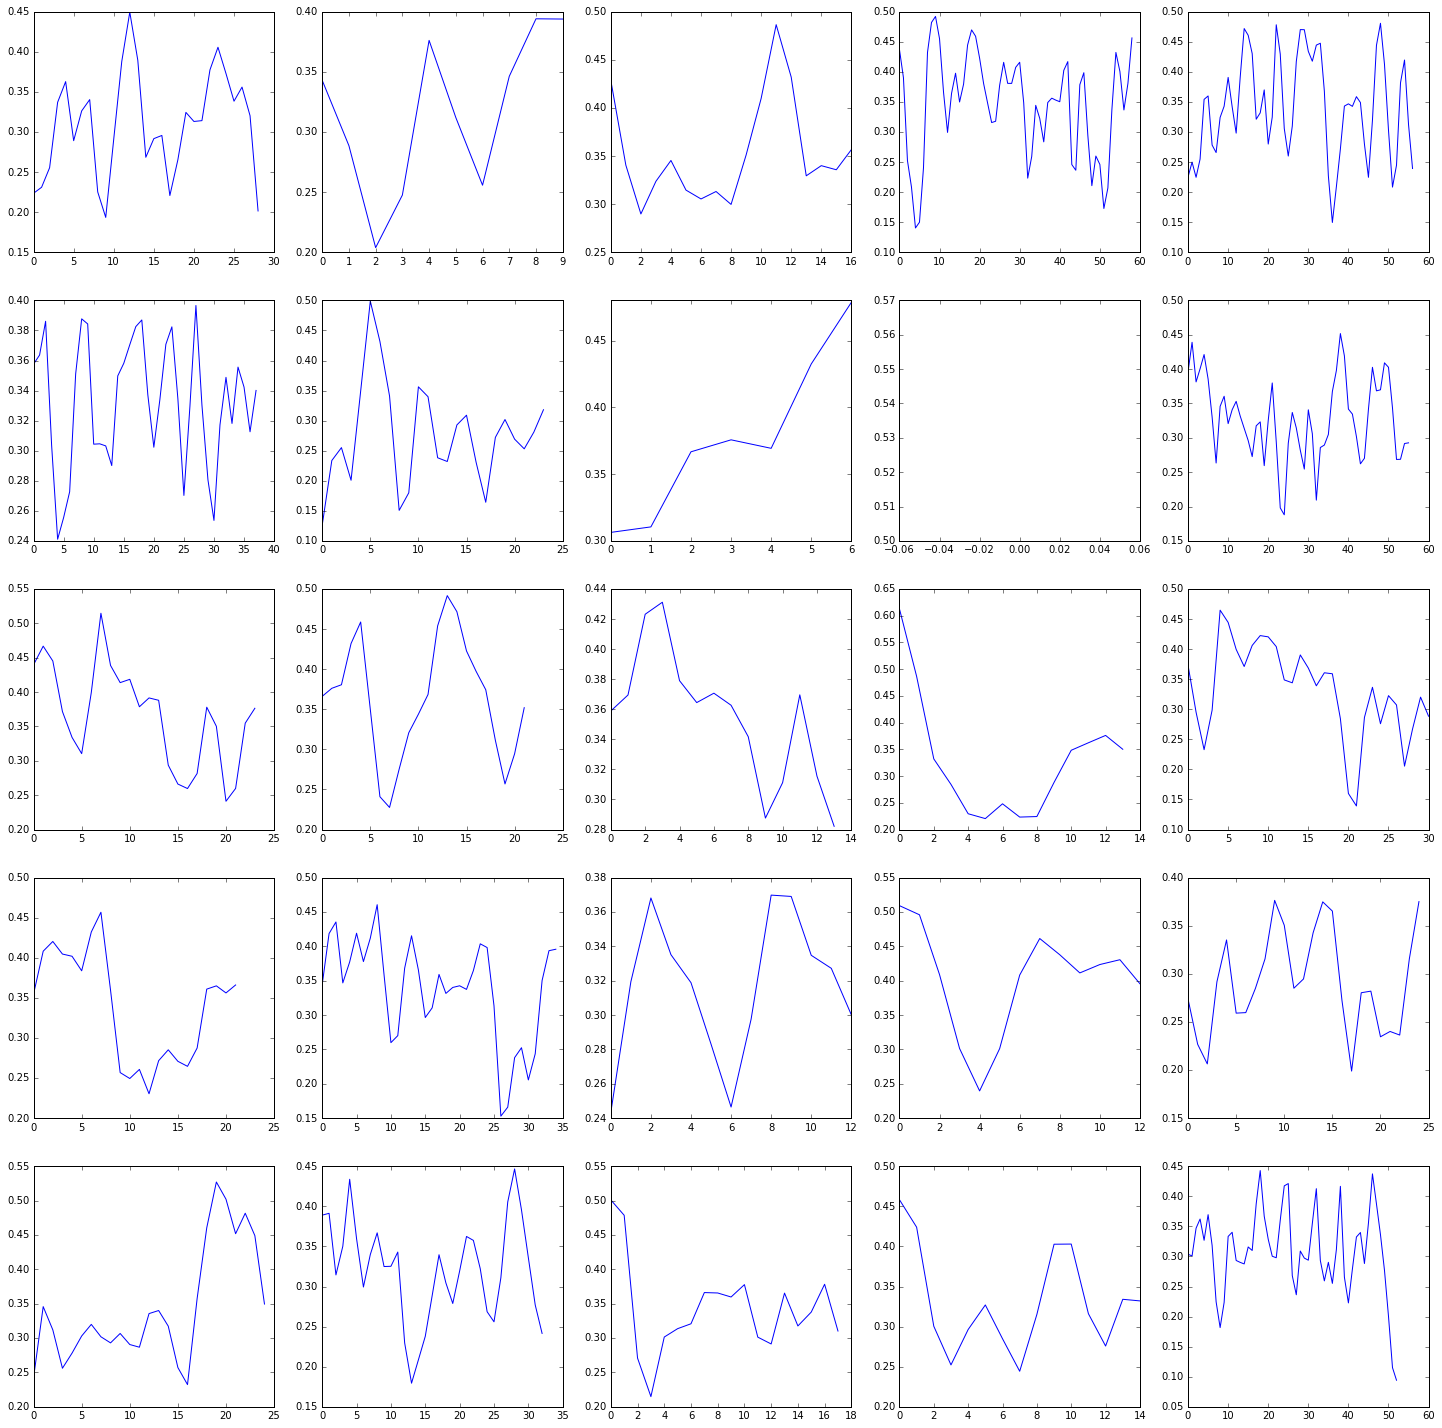

In [37]:
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.ravel()

for idx, fandom in enumerate(fandom_list):
    try:
        df = pd.read_csv(data_path + fandom, sep = '\t')
        timelist = create_timelist(df)
        windows = create_timewindow(timelist, 6, 3)
        x = []
        for window in windows:
            df_t = create_df_time(df, window)
            if len(df_t) > 0:
                x.append(np.mean(df_t.Cos.tolist()))
        axs[idx].plot(x)
    except:
        pass
   
#     axs[idx].set_title(fandom.replace('.pkl', ''), fontsize=25)
# fig.text(0.5, 0.1,'Time', ha='center', va='center', fontsize=25)
# fig.text(0.08, 0.5, 'Cosine distance', ha='center', va='center', rotation='vertical',fontsize=25)

# plt.savefig('temporal_cos_dist_box.png', format='png')
    